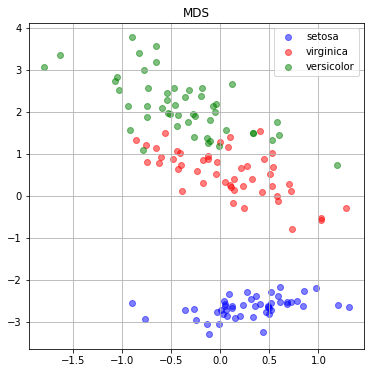

In [16]:
# 多次元尺度法とは
# 個体間の親近性データを、2次元あるいは3次元空間の位置関係(座標)で表現する方法
# データの構造を考察する方法
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# irisデータで実践
iris = load_iris()
iris_df = pd.DataFrame(
        iris.data,
        columns=iris.feature_names,
    )

clf = MDS(n_components=2, n_init=1, max_iter=100,random_state=0) # 2次元に落とし込む
X_mds = clf.fit_transform(iris_df)

# グラフで可視化
plt.figure(figsize=(6, 6))
plt.scatter(X_mds[0:49, 0], X_mds[0:49, 1], c="b", alpha=0.5, label="setosa") 
plt.scatter(X_mds[50:99, 0], X_mds[50:99, 1], c="r", alpha=0.5, label="virginica") 
plt.scatter(X_mds[100:149, 0], X_mds[100:149, 1], c="g", alpha=0.5, label="versicolor")
plt.legend()
plt.title("MDS")
plt.grid()
plt.show() # setosa, virginica, versicolorである程度分離できていることがわかる

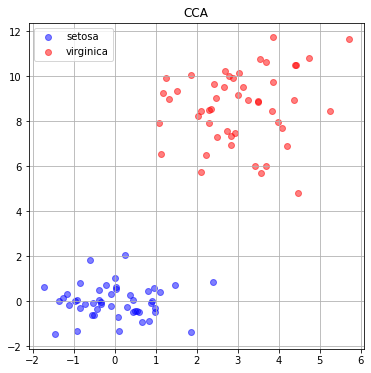

In [17]:
# 正準相関分析とは
# 2郡の多変量データをそれぞれ合成変数にまとめ、その合成変数間の相関係数を最大にする
# そこで得られたパラメータや相関係数の大きさｋから2郡の関連性を解析するための手法

from sklearn.cross_decomposition import CCA

X1 = iris_df[0:49] # setosa
X2 = iris_df[50:99] # virginica

cca = CCA(n_components=2)
cca.fit(X1, X2)

Y1 = cca.transform(X1)
Y2 = cca.transform(X2)

# データ可視化
plt.figure(figsize=(6, 6))
plt.scatter(Y1[:,0], Y1[:,1], c="b", alpha=0.5, label="setosa") 
plt.scatter(Y2[:,0], Y2[:,1], c="r", alpha=0.5, label="virginica") 
plt.legend()
plt.title("CCA")
plt.grid()
plt.show()  # setosa, virginicaで分離できていることがわかる

In [ ]:
# 数量化法、対応分析とは
# 質的データ、カテゴリカルデータを扱う多変量解析手法
# 数量化Ⅰ類…説明変数がすべて質的データの場合の重回帰分析
# 数量化Ⅱ類…説明変数がすべて質的データの場合の判別分析
# 数量化Ⅲ類…説明変数がすべて質的データの場合の主成分分析
# また、分割表であらわされるデータの分析手法として、対応分析がある